In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_fuml_salary_19-20')

In [3]:
tes.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
tes.head()

,NAME,FUML,FUML_rank,salary
0,Maxx Williams,0,27.0,3500000
1,Dawson Knox,0,27.0,880400
2,Nick Boyle,0,27.0,6000000
3,T.J. Hockenson,0,27.0,4955306
4,Josh Hill,0,27.0,2950000


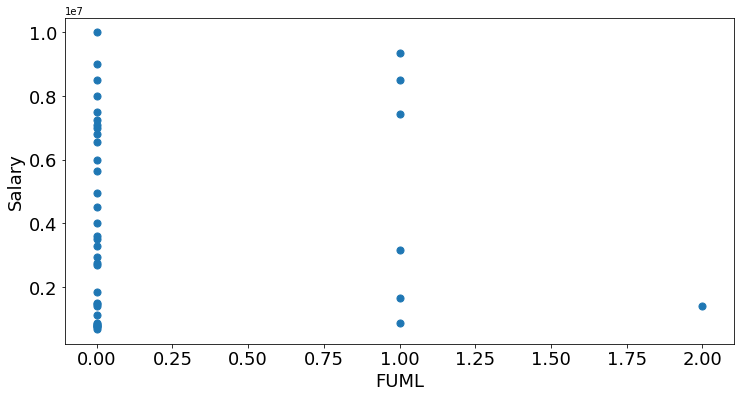

In [5]:
ax = tes.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([0.00000000e+00, 1.11022302e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.74574312,  1.43599748],
       [-0.43643578, -0.72804895],
       [ 1.74574312, -0.76761137],
       [-0.43643578,  1.03734813],
       [ 3.92792202, -0.92970499]])

In [11]:
km.predict(X)

array([1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 0, 0, 0, 2, 2, 2, 4], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Maxx Williams,0,27.0,3500000,1
1,Dawson Knox,0,27.0,880400,1
2,Nick Boyle,0,27.0,6000000,3
3,T.J. Hockenson,0,27.0,4955306,3
4,Josh Hill,0,27.0,2950000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.00000000e+00, 8.43946667e+06],
       [5.55111512e-17, 2.00560550e+06],
       [1.00000000e+00, 1.88798367e+06],
       [8.32667268e-17, 7.25425431e+06],
       [2.00000000e+00, 1.40606800e+06]])

In [14]:
tes.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,1.0,8.439467e+06
1,0.0,2.005606e+06
2,1.0,1.887984e+06
3,0.0,7.254254e+06
4,2.0,1.406068e+06


In [15]:
centroids = tes.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

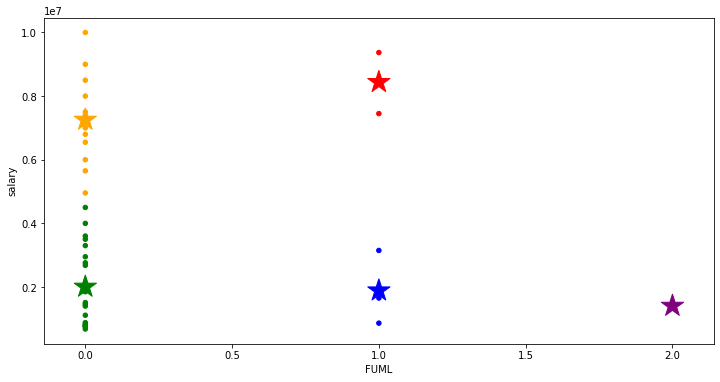

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

6.591410359398445

In [18]:
silhouette_score(X, km.labels_)

0.6730573846094632